In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statistics import mean
import math
import numpy.random as rd

In [5]:
# this function generates given no of random numbers from [0,1]
# Xo is the seed
# full period if m is a power of 2, c is odd and a is 4*n + 1
def Uniform_Distribution(Xo, m, a, c,N):
    arr1 = []
    arr = []
    arr1.append(Xo%m)
    for i in range(1, N):
        arr1.append((arr1[i - 1] * a + c) % m)
    for i in range(0,N):
        arr.append(arr1[i]/m)
    return arr

In [6]:
# it is the inverse of CDF of g
def G_inverse(x):
    return 2*np.tan(np.pi*(x-0.5))

# dominating PDF
def g(x):
    return 1/(x*np.pi*(1 + (x**2)/4))

# target PDF
def f(x):
    v = 3.2
    return (math.gamma((v+1)/2)*((1 + (x**2)/v)**((-v-1)/2)))/(np.sqrt(np.pi*v)*math.gamma(v/2))

def acc_rej(N):
    Iteration_cnt = 0
    # generating number with density g(x)
    num = 10*N
    U1 = Uniform_Distribution(31, 2**60, 101, 3,num)
    X = []
    for i in range(num):
        X.append(G_inverse(U1[i]))    
    c = (math.gamma(2.1)*2*np.pi)/((np.sqrt(np.pi*3.2))*math.gamma(1.6))
    print(1/c)
# generated for accepting value with a give probability     
    U2 = Uniform_Distribution(19, 2**50, 65, 9,num)
    j = 0
    out = np.zeros(N)
    for i in range(N):
        while True:
            Iteration_cnt = Iteration_cnt + 1
            x = X[j]
            u2 = U2[j]
            j = j + 1
# accepting the generated value with prob f(x)/c*g(x)
            if c*g(x)*u2 <= f(x):
                out[i] = x
                break
    return out, Iteration_cnt

In [7]:
arr, cnt = acc_rej(10000)

0.43086251830168326


In [8]:
print(1000/cnt)

0.0610798924993892


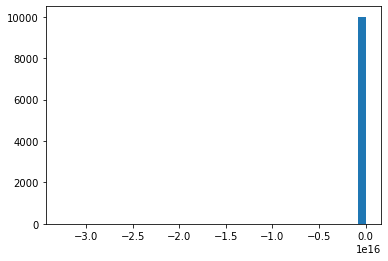

In [11]:
plt.hist(arr,  40)
plt.show()